# <span style='color:OrangeRed'>V1-Zeitdiskrete Systeme </span>

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

<b>Wie kann sich die Abtastfrequenz auf eine Zahlenfolge auswirken?</b>

- Wir nehmen folgende Abtastfrequenz:  $f_{a}=10.000 Hz$
- Hier gilt: $T=\frac{1}{f_{a}}$ , $K_{max}=20.000$ , $k=[1...K_{max}]$ ,  $t=Tk$.
- Wähle einen Ton mit 440 Hz. Es gilt:$\omega=2\pi440$
- Die Zahlenfolge wird definiert mit:$y=sin(\omega*t)$

<br>
Folgender Python Code erzeugt die Wiedergabe des Tons <code>y</code>  mit der Frequenz <code>fa</code>:

In [1]:
from systheo2functions import *
from IPython.lib.display import Audio
%matplotlib widget

#Im Folgenden wird die Abspielrate eines Tones als Abtastfrequenz betrachtet

fa = 10000.0 #die später gewollte Abspielrate (gewünschte Abtastfrequenz)
T = 1.0/fa #Periodendauer der Abtastfrequenz

mink = 1
maxk = 20000
k=np.array(range(mink, maxk+1))

#Die Zeit in Sekunden t geht von mink*T bis maxk*T und hat mink bis maxk Einträge:
t = T*k

#Zahlenfolge y ist der Ton mit einer Frequenz von 440Hz auf der Zeit t:
om = 2*pi*440
y = np.sin(om*t)

#Abspielen des Tones mit der Abtastfrequenz fa:
Audio(y, rate=fa, autoplay=False)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es wird nun die Abtastfrequenz fa2 zum Abspielen des Tons genutzt:

In [2]:
#Abspielen des Tones mit der einer anderen Abtastfrequenz fa2:
def f(fa2):
    return Audio(y, rate=fa2, autoplay=False)


interact(f, fa2=widgets.IntSlider(min=1000, max=10000, step=100, value=5000));

interactive(children=(IntSlider(value=5000, description='fa2', max=10000, min=1000, step=100), Output()), _dom…

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Ton wird <span style='color:red'> fehlerhaft </span> wiedergegeben (solange fa2 nicht gleich fa) und weicht von dem Originalton ab!

## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<b> Abtastung und Quantisierung</b>

 - Die Frequenzen für das Signal 1 und 2 werden gewählt: $\omega_{1}=1$, $\omega_{2}=1+2\pi$

 - Die Abtastkreisfrequenz und Abtastzeit entsprechen:$\omega_{T}=2\pi$, $T=\frac{2\pi}{\omega_T}$
  
 - Des Weiteren wird für die Folge bestimmt:$K_{max}=7$, $k=[1...K_{max}]$ ,  $t=Tk$.

Im Folgenden erzeugen wir zwei abgetastete Signale <code>y1</code> und <code>y2</code>:

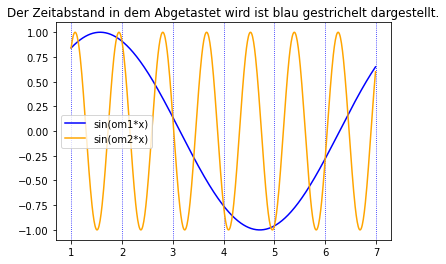

In [3]:
%matplotlib inline

#Frequenz Signal 1
om1 = 1

#Frequenz Signal 2
om2 = 1+2*pi

#Abtast Frequenz
om_T = 2*pi

#Abtast Zeit (Zeitabstand in dem Abgetastet wird)
T = 2*pi/om_T

#k=(mink...maxk) (Folge mit Zahlen von mink bis maxk)
mink = 1
maxk = 7
k=np.array(range(mink, maxk+1))

#t=(mink*T...maxk*T) (Folge mit Zahlen von mink*T bis maxk*T)
t = T*k

#Darstellung der originalen Signale 1 und 2
x = np.arange(1,7,0.01)
y1_o = np.sin(om1*x)
y2_o = np.sin(om2*x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(t)
ax.grid(axis='x',linestyle='dotted', color='b')
ax.plot(x,y1_o,'b',x,y2_o,'orange')
ax.legend(['sin(om1*x)','sin(om2*x)'])
ax.set_title('Der Zeitabstand in dem Abgetastet wird ist blau gestrichelt dargestellt.')
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Signale dargestellt mit der gegebenen Abtastzeit:

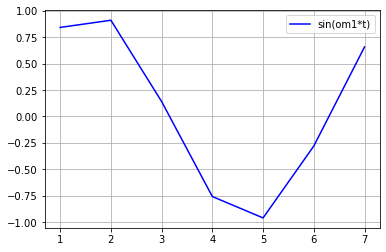

In [4]:
y1 = np.sin(om1*t)

plt.plot(t,y1,'b')
plt.grid()
plt.legend(['sin(om1*t)']);
plt.show()

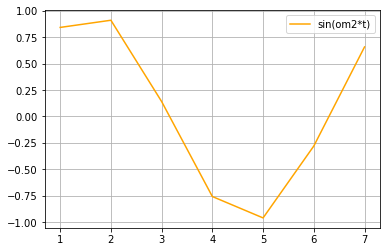

In [5]:
y2 = np.sin(om2*t)

plt.plot(t,y2,'orange')
plt.grid()
plt.legend(['sin(om2*t)']);
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Durch Abtastung erhält man nur eine unvollständige Information über das betrachtete
Signal. Es gibt sehr viele Funktionen die durch die Abtastwerte verlaufen können.
    <br>

<span style='color:Gray'>Beispiel </span> : Es werden zwei sinusförmige Signale betrachtet:
<br>
    $y_1(t)=sin(\omega_1t)$ ,         $y_2(t)=sin(\omega_2t)$

die auf die Abtastfolgen führen:
<br>     $y_1(k)=sin(k\omega_1t)$ ,         $y_2(k)=sin(k\omega_2t)$

Die Abtastwerte für beide Funktionen sind an allen Abtastpunkten gleich wenn
$sin(k\omega_1T)=sin(k\omega_2T)$                                                                          
$(k=0, 1,...)$ gilt, was in
$\omega_1=\omega_2+l\frac{2\pi}{kT}$
umgeformt werden kann.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    
- $\omega_1=\omega_2+l\frac{2\pi}{kT}$  
($l$ ganzzahlig)
<br><br>
- $\omega_1=\omega_2+\omega_T$             
($ \omega_T$ Abtastkreisfrequenz)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Erfüllen zwei Frequenzen die obere Beziehung, so können die von der Sinusschwingung
mit der Kreisfrequenz $\omega_1$ erzeugten Abtastwerte auch durch eine Sinusschwingung mit der
Kreisfrequenz $\omega_2$ erzeugt werden.

<span style='color:OrangeRed'>Das heißt Signale mit diesen beiden Frequenzen können hinter dem Abtaster nicht mehr
unterschieden werden! </span>
